In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
#import torch
#import torch.nn as nn
#import torch.nn.functional as F
#import torch.optim as optim
#import re, string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


import nltk
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import string

In [2]:
IMDB = pd.read_csv('IMDB Dataset.csv')

In [3]:
with open('positive-words.txt') as f:
    g_lines = f.readlines()
    good = []
    for l in g_lines:
        good_list = l.split('\n')
        good.append(good_list[0]) #list of the positive words
    good_start_index = good.index("a+")
    good = good[good_start_index:]
    print(good)

['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation', 'accolade', 'accolades', 'accommodative', 'accomodative', 'accomplish', 'accomplished', 'accomplishment', 'accomplishments', 'accurate', 'accurately', 'achievable', 'achievement', 'achievements', 'achievible', 'acumen', 'adaptable', 'adaptive', 'adequate', 'adjustable', 'admirable', 'admirably', 'admiration', 'admire', 'admirer', 'admiring', 'admiringly', 'adorable', 'adore', 'adored', 'adorer', 'adoring', 'adoringly', 'adroit', 'adroitly', 'adulate', 'adulation', 'adulatory', 'advanced', 'advantage', 'advantageous', 'advantageously', 'advantages', 'adventuresome', 'adventurous', 'advocate', 'advocated', 'advocates', 'affability', 'affable', 'affably', 'affectation', 'affection', 'affectionate', 'affinity', 'affirm', 'affirmation', 'affirmative', 'affluence', 'affluent', 'afford', 'affordable', 'affordably', 'afordable', 'agile', 'agilely', 'agility', 'agreeable', 'ag

In [4]:
with open('negative-words.txt') as g:
    b_lines = g.readlines()
    bad = []
    for l in b_lines:
        bad_list = l.split('\n')
        bad.append(bad_list[0]) #list of the negative words
    bad_start_index = bad.index("2-faced")
    bad = bad[bad_start_index:]
    print(bad)

['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted', 'aborts', 'abrade', 'abrasive', 'abrupt', 'abruptly', 'abscond', 'absence', 'absent-minded', 'absentee', 'absurd', 'absurdity', 'absurdly', 'absurdness', 'abuse', 'abused', 'abuses', 'abusive', 'abysmal', 'abysmally', 'abyss', 'accidental', 'accost', 'accursed', 'accusation', 'accusations', 'accuse', 'accuses', 'accusing', 'accusingly', 'acerbate', 'acerbic', 'acerbically', 'ache', 'ached', 'aches', 'achey', 'aching', 'acrid', 'acridly', 'acridness', 'acrimonious', 'acrimoniously', 'acrimony', 'adamant', 'adamantly', 'addict', 'addicted', 'addicting', 'addicts', 'admonish', 'admonisher', 'admonishingly', 'admonishment', 'admonition', 'adulterate', 'adulterated', 'adulteration', 'adulterier', 'adversarial', 'adversary', 'adverse', 'adversity', 'afflict', 'affliction', 'afflictive', 'affront', 'afraid', 'aggravate', 'aggravating', 'aggravation', 'aggression', 'aggress

In [5]:
IMDB.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


## Descriptive Statistics ##

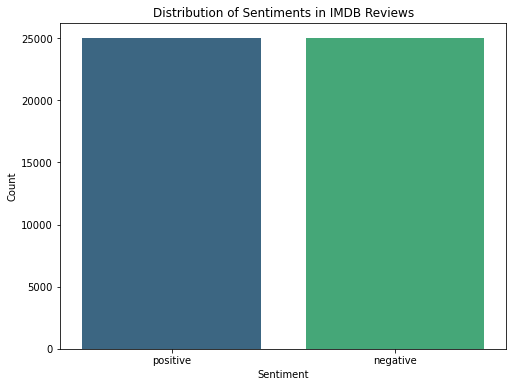

In [6]:
# Create a bar chart
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=IMDB, palette='viridis')

# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments in IMDB Reviews')

# Show the plot
plt.show()

From the bar chart we can see that there are 50,000 reviews with an equal amount of positive and negative reviews.

In [7]:
IMDB['sentiment'] = IMDB['sentiment'].map({'positive': 1, 'negative': 0})

In [8]:
IMDB.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
5,"Probably my all-time favorite movie, a story o...",1
6,I sure would like to see a resurrection of a u...,1
7,"This show was an amazing, fresh & innovative i...",0
8,Encouraged by the positive comments about this...,0
9,If you like original gut wrenching laughter yo...,1


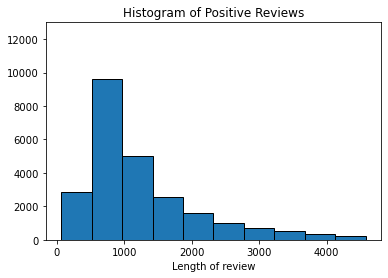

Mean length of positive reviews: 1241.054
Median length of positive reviews: 953.0


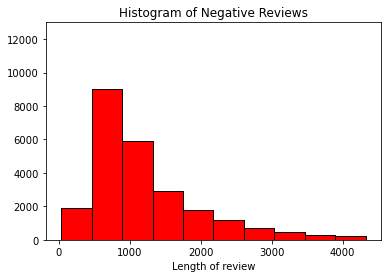

Mean length of negative reviews: 1215.670612244898
Median length of negative reviews: 959.0


In [39]:
positive = IMDB[IMDB['sentiment']== 1]
positive_reviews = positive['review']
positive_reviews = positive_reviews.to_frame() 
positive_store = []

for i in range(len(positive_reviews)):
     positive_store.append((len(positive_reviews.iloc[i,0])))

positive_store = (sorted(positive_store)[0:24500])
plt.hist(positive_store, bins=10, edgecolor='black')
plt.title('Histogram of Positive Reviews')
plt.xlabel('Length of review')
plt.ylim(0,13000)
plt.show()
print("Mean length of positive reviews:",sum(positive_store)/len(positive_store))
print("Median length of positive reviews:",np.median(positive_store))



negative = IMDB[IMDB['sentiment']== 0]
negative_reviews = negative['review']
negative_reviews = negative_reviews.to_frame() 
negative_store = []

for i in range(len(negative_reviews)):
     negative_store.append((len(negative_reviews.iloc[i,0])))

negative_store = (sorted(negative_store)[0:24500])
plt.hist(negative_store, bins=10, edgecolor='black', color = 'red')
plt.title('Histogram of Negative Reviews')
plt.xlabel('Length of review')
plt.ylim(0,13000)
plt.show()


print("Mean length of negative reviews:",sum(negative_store)/len(negative_store))
print("Median length of negative reviews:",np.median(negative_store))  


Note: We removed the greatest 500 values for each histogram (reviews with lengths > 4500) in order to create roughly equal bin widths in order to compare the two histograms and look closer at shape and center (as well as to improve efficiency). 
From the histograms above, we see that both positive reviews and negative reviews are right skewed, indicating that most reviews are short in nature.  In addition, the most frequent bin for both histograms is the 600-1200 length of review bin. We see that there's a higher frequency of the 600-1200 length of review bin for negative reviews compared to the respective bin for positive reviews, while there's a higher frequency of 0-600 length of review bin for positive reviews compared to the respective bin for negative reviews. Thus, we can conclude that the shortest reviews tend to be positive reviews.

In [197]:
X = IMDB['review']
y = IMDB['sentiment']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, \
                                                    random_state=9)

In [198]:
y_train


30309    0
48725    1
14609    0
11364    1
11850    1
        ..
5014     1
42747    1
22584    1
501      1
20828    0
Name: sentiment, Length: 40000, dtype: int64

In [199]:
y_test.value_counts()

0    5023
1    4977
Name: sentiment, dtype: int64

In [219]:
from collections import Counter
import spacy
import re, string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#spacy.cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm")
from sklearn.feature_extraction.text import TfidfVectorizer
    

def process_string(review):
  # 1. Remove tags (things like <...>)
    review = str(review)
    review = re.sub(r'<.*?>', '', review)

    # 2. Remove punctuation and make all letters lowercase
    review = review.lower()
    review = review.translate(str.maketrans('', '', string.punctuation))

    # 3. Remove duplicate spaces, e.g., '     ' -> ' '
    review = ' '.join(review.split())
    
    # 4. Remove stopwords
    stop_words = set(stopwords.words('english'))
    review = ' '.join(word for word in review.split() if word not in stop_words)
    
    ## 5. Lemmatize (coverts to base word)
    doc = nlp(review)
    lemmatized_tokens = [token.lemma_ for token in doc]
    review = ' '.join(lemmatized_tokens)

    # 6. Check if it's an adverb and convert to adjective (assuming adverb w/ -ly ending has length >= 4)
    adverb_pattern = re.compile(r'\b(\w+ly)\b', flags=re.IGNORECASE)
    review = adverb_pattern.sub(lambda match: match.group(1)[:-2] if len(match.group(1)[:-2]) >= 4 else match.group(1),review)    
    #print(review)
    
     # TF-IDF Integration within the function
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform([review])
    feature_names = vectorizer.get_feature_names_out()

    tfidf_dict = dict(zip(feature_names, tfidf_matrix.toarray().flatten()))
    #counts_bad_good_words(review)
    
    # Print TF-IDF scores for words in the review
    #print("TF-IDF Scores:")
   # for word, score in sorted(tfidf_dict.items(), key=lambda x: x[1], reverse=True)[:10]:
       # print(f"{word}: {score}")

    # Print TF-IDF scores for words in the review
    #print("TF-IDF Scores:")
    #for word, score in sorted(tfidf_dict.items(), key=lambda x: x[1], reverse=True)[:10]:
 #       print(f"{word}: {score}")

#from collections import Counter
#def counts_bad_good_words(review):
    bad_count_total = 0
    good_count_total = 0
    bad_counts_word = Counter()
    good_counts_word = Counter()
    
    for word in review.split():
        if any(bad_word in word.lower() for bad_word in bad):
            bad_count_total += 1
            bad_counts_word[word] += 1
        elif any(good_word in word.lower() for good_word in good):
            good_count_total +=1
            good_counts_word[word] += 1
    #bad_counts_word = dict(bad_counts_word)
    #good_counts_word = dict(good_counts_word)
    #print("List of bad words:", bad_counts_word)
    #print("List of good words:", good_counts_word)
   # print("Total Bad Words: ", bad_count_total)
    #print("Total Good Words: ", good_count_total)
    
    return review, bad_counts_word, good_counts_word




x_train.iloc[0:10].apply(process_string)




30309    (lack content movie amaze first though people ...
48725    (get see believe shot hollywood strip middle s...
14609    (message movie personality important beauty je...
11364    (word real describe seriesthe premise behind c...
11850    (sensitive extreme quiet pace love story marry...
8648     (1930 golden age los angeles film industry gre...
16411    (gary busey title character frank bulletproof ...
9518     (maybe need head examinedbut think pretty good...
22775    (say tromeo juliet like twist troma machinatio...
43153    (mary tyler moore valerie harper still turn wo...
Name: review, dtype: object

In [229]:
IMDB = pd.read_csv("processed_reviews.csv")
IMDB["processed_review"].iloc[0:100]
#IMDB[["bad_counts", "good_counts"]] = IMDB['processed_review'].iloc[:].apply(counts_bad_good_words).apply(pd.Series)
#IMDB
#IMDB.to_csv("final.csv")


0     one reviewer mention watch 1 oz episode you ll...
1     wonderful little production filming technique ...
2     think wonderful way spend time hot summer week...
3     basical there s fami little boy jake think the...
4     petter matteis love time money visual stunning...
                            ...                        
95    performance every actor actress film excellent...
96    star trek motion picture most boring star trek...
97    despite later claim earlytalkie melodrama litt...
98    good version far see true bronte work dalton l...
99    apparent people write back box bother watch so...
Name: processed_review, Length: 100, dtype: object

Text(0, 0.5, 'Cumulative Variance Explained')

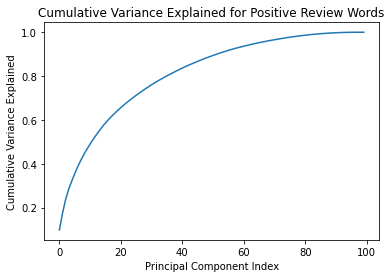

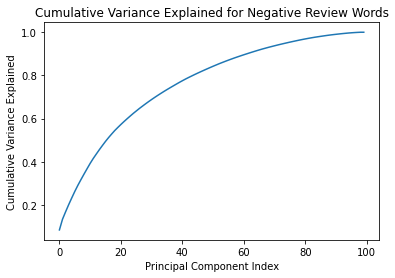

In [230]:
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd


new = IMDB["processed_review"].iloc[0:100].apply(process_string)
compile_bad_dicts = []
compile_good_dicts = []
for i in range(100):
    compile_bad_dicts.append(dict(new.iloc[i][1]))
    compile_good_dicts.append(dict(new.iloc[i][2]))
df_bad = (pd.DataFrame(compile_bad_dicts).fillna(0).astype(int))
df_good = (pd.DataFrame(compile_good_dicts).fillna(0).astype(int))


#print(df_bad)
#print(df_good)

pca_good = PCA(n_components=100)
df_good_pca = pca_good.fit_transform(df_good)
var_explained_good = pca_good.explained_variance_ratio_
var_cumulative_good = np.cumsum(var_explained_good)
plt.plot(var_cumulative_good)
plt.title("Cumulative Variance Explained for Positive Review Words")
plt.xlabel("Principal Component Index")
plt.ylabel("Cumulative Variance Explained")



pca_bad = PCA(n_components=100)
df_bad_pca_bad = pca_bad.fit_transform(df_bad)
var_explained_bad = pca_bad.explained_variance_ratio_
var_cumulative_bad = np.cumsum(var_explained_bad)
plt.figure()
plt.plot(var_cumulative_bad)
plt.title("Cumulative Variance Explained for Negative Review Words")
plt.xlabel("Principal Component Index")
plt.ylabel("Cumulative Variance Explained")



In [15]:
#X_train = x_train.apply(process_string)
#X_test = x_test.apply(process_string)

In [16]:
#count_vect = CountVectorizer(min_df=5)
#X_train_counts = count_vect.fit_transform(X_train)
#X_test_counts = count_vect.transform(X_test)

#print("Train shape:", X_train_counts.shape, "Test shape:", X_test_counts.shape)